In [179]:
import pandas as pd

def read_file(filename):
    df = pd.read_csv(filename, delimiter='\t')
    return df

In [180]:
folder_path=".\MovieSummaries"
character_metadata= folder_path+"\character.metadata.tsv"
movie_metadata= folder_path+ "\movie.metadata.tsv"

In [181]:
character_df= read_file(character_metadata)
# Column names
column_names = [
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie release date",
    "Character name",
    "Actor date of birth",
    "Actor gender",
    "Actor height (in meters)",
    "Actor ethnicity (Freebase ID)",
    "Actor name",
    "Actor age at movie release",
    "Freebase character/actor map ID",
    "Freebase character ID",
    "Freebase actor ID"
]
character_df.columns = column_names


In [182]:
character_df.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
1,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
2,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
3,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
4,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft


In [183]:
movie_df= read_file(movie_metadata)
# Column names
column_names = [
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie name",
    "Movie release date",
    "Movie box office revenue",
    "Movie runtime",
    "Movie languages (Freebase ID:name tuples)",
    "Movie countries (Freebase ID:name tuples)",
    "Movie genres (Freebase ID:name tuples)"
]

movie_df.columns = column_names

In [184]:
movie_df.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples)
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
1,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
3,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
4,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."


In [185]:
# Read tvtropes.clusters.txt and create a dataframe
tvtropes_data = pd.read_csv(folder_path+'\\tvtropes.clusters.txt', sep='\t', header=None)
tvtropes_data.columns = ['Character Type', 'Info']

# Read name.clusters.txt and create a dataframe
name_data = pd.read_csv(folder_path+'\\name.clusters.txt', sep='\t', header=None)
name_data.columns = ['Character Name', 'ID']


# Read plot_summaries.txt and create a dataframe
summary_data = pd.read_csv(folder_path+'\\plot_summaries.txt', sep='\t', header=None)
summary_data.columns = ['ID', 'summary']

In [186]:
import json
tvtropes_data = pd.concat([tvtropes_data['Character Type'], tvtropes_data['Info'].apply(lambda x: pd.Series(json.loads(x)))], axis=1)

In [187]:
tvtropes_data.head()

,Character Type,char,movie,id,actor
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


In [93]:
#combine the character df with the name of the characters in the movies
character_named_combined= character_df.merge(name_data, left_on='Freebase character/actor map ID', right_on='ID', how='inner')
character_named_combined.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Character Name,ID
0,5894429,/m/0fc8w8,2007-09-14,Young Jack,1983-07-06,M,1.79,/m/0g8_vp,Gregory Smith,24.0,/m/03jq87t,/m/0h58k54,/m/03_nv3,Young Jack,/m/03jq87t
1,196176,/m/01bwgr,1971-11-03,Amy Sumner,1950-07-26,F,1.65,NaN,Susan George,21.0,/m/02vc216,/m/0ch92bz,/m/02ps7rq,Amy Sumner,/m/02vc216
2,196176,/m/01bwgr,1971-11-03,David Sumner,1937-08-08,M,1.66,/m/041rx,Dustin Hoffman,34.0,/m/0k3v65,/m/0ch916z,/m/0bl2g,David Sumner,/m/0k3v65
3,748616,/m/03813g,2003-08-14,The Girl,NaN,F,NaN,NaN,Yeo-jin Ha,NaN,/m/0bvbj8n,/m/0bvbj70,/m/0bvbj6y,The Girl,/m/0bvbj8n
4,362719,/m/01_mdl,1978-12-10,Lex Luthor,1930-01-30,M,1.88,/m/07hwkr,Gene Hackman,48.0,/m/0k3z0y,/m/04q78,/m/039bp,Lex Luthor,/m/0k3z0y


In [94]:
character_name_rep = character_df['Character name'].value_counts()
character_name_rep

Character name
Doctor           198
Sam              187
Jack             185
Mary             168
Anna             164
                ... 
Dale McDonald      1
Loz                1
Rob Haley          1
Max Templeton      1
Elensh             1
Name: count, Length: 126628, dtype: int64

In [188]:
#change the Id of name_data to more understandable name 
name_data = name_data.rename(columns={'ID': 'Freebase character/actor map ID'})

In [189]:
summary_data.head()

,ID,summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [190]:
#combine with summaries to see character-summary relation
character_summary_combined= character_df.merge(summary_data, left_on="Wikipedia movie ID", right_on="ID", how="inner" )
character_summary_combined.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,ID,summary
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,975900,"Set in the second half of the 22nd century, th..."
1,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,975900,"Set in the second half of the 22nd century, th..."
2,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,975900,"Set in the second half of the 22nd century, th..."
3,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,975900,"Set in the second half of the 22nd century, th..."
4,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,975900,"Set in the second half of the 22nd century, th..."


In [191]:
summary_data=summary_data.rename(columns={"ID":"Wikipedia movie ID"})

In [192]:
character_tvtropes_combined= character_df.merge(tvtropes_data, left_on="Freebase character/actor map ID", right_on="id", how="inner" )
character_tvtropes_combined.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Character Type,char,movie,id,actor
0,196176,/m/01bwgr,1971-11-03,David Sumner,1937-08-08,M,1.66,/m/041rx,Dustin Hoffman,34.0,/m/0k3v65,/m/0ch916z,/m/0bl2g,tranquil_fury,David Sumner,Straw Dogs,/m/0k3v65,Dustin Hoffman
1,1157158,/m/04c13q,2002-03-29,Sheldon Mopes,1969-08-18,M,1.83,NaN,Edward Norton,32.0,/m/0jx3b8,/m/0gy99_8,/m/01515w,granola_person,Sheldon Mopes,Death to Smoochy,/m/0jx3b8,Edward Norton
2,504242,/m/02j9_2,2005-08-22,Mr. Universe,1978-05-15,M,1.68,/m/041rx,David Krumholtz,27.0,/m/0k31lb,/m/02sgjdt,/m/05cx7x,playful_hacker,Mr. Universe,Serenity,/m/0k31lb,David Krumholtz
3,6917005,/m/0gwypk,2003-02-16,Harold Hill,1962-03-21,M,1.73,/m/041rx,Matthew Broderick,40.0,/m/04hv61w,/m/09j606t,/m/01vlj1g,charmer,Harold Hill,The Music Man,/m/04hv61w,Matthew Broderick
4,6917005,/m/0gwypk,2003-02-16,Harold Hill,1962-03-21,M,1.73,/m/041rx,Matthew Broderick,40.0,/m/04hv61w,/m/09j606t,/m/01vlj1g,loveable_rogue,Harold Hill,The Music Man,/m/04hv61w,Matthew Broderick


In [193]:
tvtropes_data=tvtropes_data.rename(columns={"id":"Freebase character/actor map ID"})

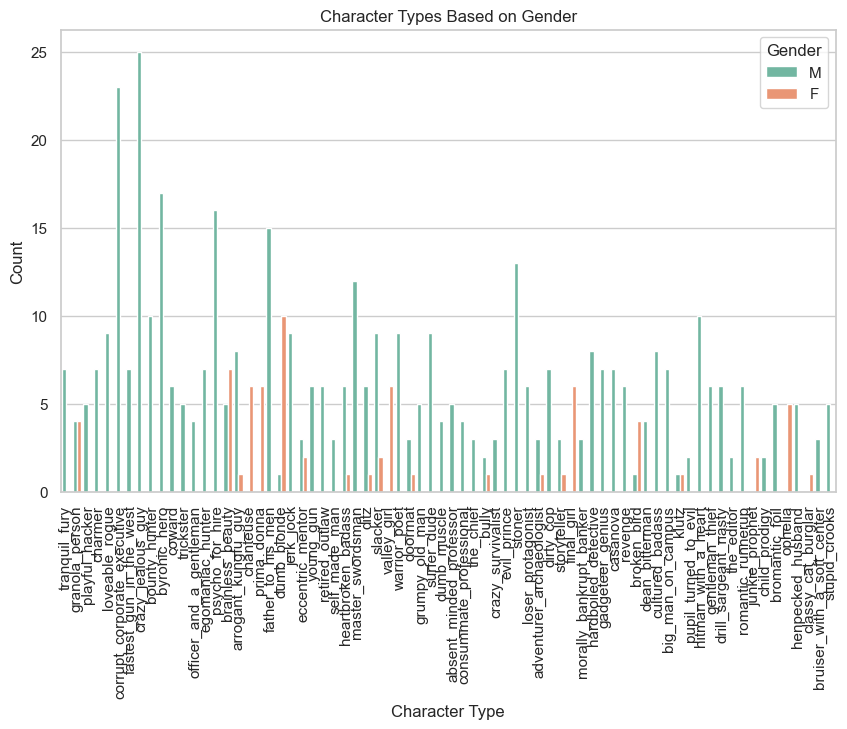

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and specify the figsize
plt.figure(figsize=(10, 6))

# Create a countplot
sns.set(style="whitegrid")
sns.countplot(data=character_tvtropes_combined, x="Character Type", hue="Actor gender", palette="Set2")

# Add labels and title
plt.xlabel("Character Type")
plt.ylabel("Count")
plt.title("Character Types Based on Gender")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.legend(title="Gender", loc="upper right")
plt.show()

C:\Users\Nazlican\AppData\Local\Temp\ipykernel_20740\3208072189.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=female_data, x="Character Type", palette="Set2", ax=axes[0])
C:\Users\Nazlican\AppData\Local\Temp\ipykernel_20740\3208072189.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=male_data, x="Character Type", palette="Set2", ax=axes[1])


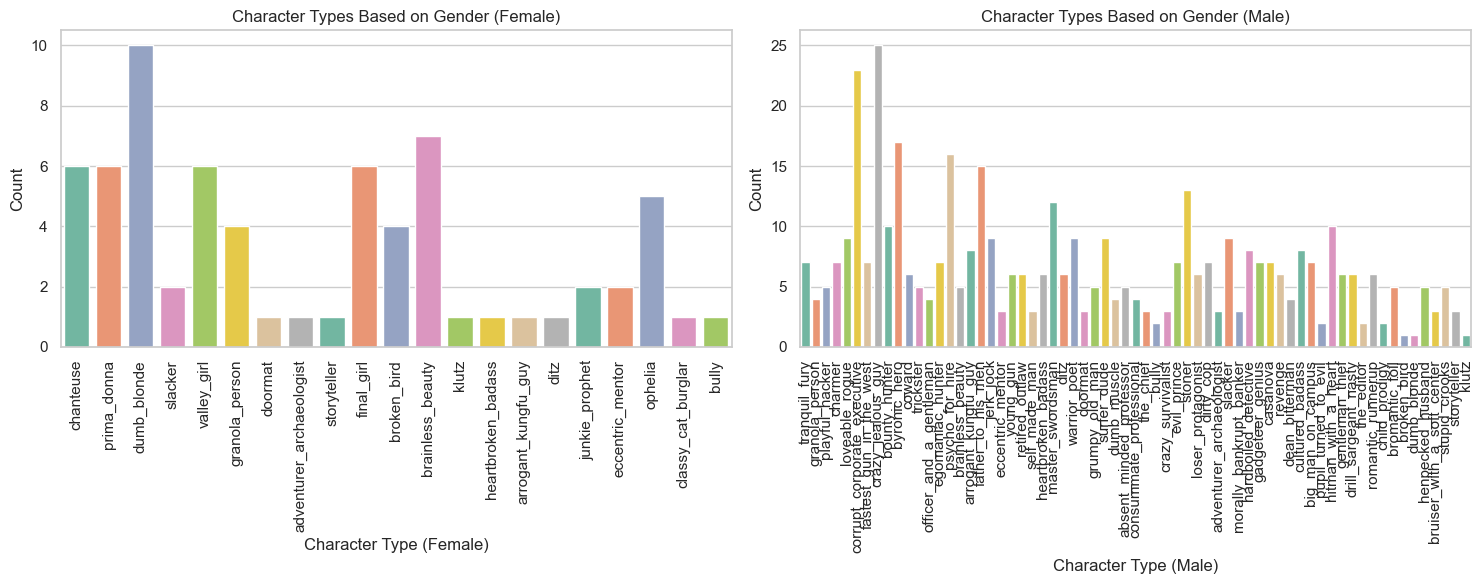

In [195]:
# Create a figure with two subplots (for Female and Male)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Filter the data for Female (F)
female_data = character_tvtropes_combined[character_tvtropes_combined['Actor gender'] == 'F']

# Create a countplot for Female
sns.set(style="whitegrid")
sns.countplot(data=female_data, x="Character Type", palette="Set2", ax=axes[0])
axes[0].set_xlabel("Character Type (Female)")
axes[0].set_ylabel("Count")
axes[0].set_title("Character Types Based on Gender (Female)")

# Filter the data for Male (M)
male_data = character_tvtropes_combined[character_tvtropes_combined['Actor gender'] == 'M']

# Create a countplot for Male
sns.set(style="whitegrid")
sns.countplot(data=male_data, x="Character Type", palette="Set2", ax=axes[1])
axes[1].set_xlabel("Character Type (Male)")
axes[1].set_ylabel("Count")
axes[1].set_title("Character Types Based on Gender (Male)")

# Rotate x-axis labels for better readability in both subplots
axes[0].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='x', rotation=90)

# Show the plots
plt.tight_layout()
plt.show()

In [198]:
unique_character_types = character_tvtropes_combined['Character Type'].unique()
unique_df = pd.DataFrame({'Character Type': unique_character_types})


In [200]:
unique_df.to_excel('unique_character_types.xlsx', index=False)

In [209]:
# Read the Excel file into a DataFrame
char_desc = pd.read_excel('unique_character_types.xlsx', engine='openpyxl')
# Display the DataFrame
char_desc

,Character Type,Description
0,tranquil_fury,There may come a time when going berserk simpl...
1,granola_person,"A comical left-wing, environmentalist-spiritua..."
2,playful_hacker,As opposed to the malicious Cracker who uses h...
3,charmer,"The Jack-the-Lad. Cocky, cheeky and devil-may-..."
4,loveable_rogue,"A person who breaks the law, for their own per..."
...,...,...
67,ophelia,"In Real Life mental illness is rarely pretty, ..."
68,henpecked_husband,The poor guy; he squirms under the thumb of a ...
69,classy_cat_burglar,"Walking, talking, purring class. She doesn't s..."
70,bruiser_with_a_soft_center,"The big, burly, super macho guy who is nothing..."


In [210]:
# Extract character types with only female characters
character_types_only_female = character_tvtropes_combined[character_tvtropes_combined['Actor gender'] == 'F']['Character Type'].unique()

# Extract character types with only male characters
character_types_only_male = character_tvtropes_combined[character_tvtropes_combined['Actor gender'] == 'M']['Character Type'].unique()

# Extract character types with both female and male characters
character_types_both = set(character_types_only_female) & set(character_types_only_male)

# Convert the sets to lists for easier handling
character_types_only_female = list(set(character_types_only_female) - character_types_both)
character_types_only_male = list(set(character_types_only_male) - character_types_both)
character_types_both = list(character_types_both)

# Print the lists
print("Character Types with Only Female Characters:")
print(character_types_only_female)
print("\nCharacter Types with Only Male Characters:")
print(character_types_only_male)
print("\nCharacter Types with Both Female and Male Characters:")
print(character_types_both)


Character Types with Only Female Characters:
['final_girl', 'chanteuse', 'valley_girl', 'classy_cat_burglar', 'junkie_prophet', 'ophelia', 'prima_donna']

Character Types with Only Male Characters:
['stupid_crooks', 'jerk_jock', 'bruiser_with_a_soft_center', 'warrior_poet', 'stoner', 'the_editor', 'child_prodigy', 'father_to_his_men', 'big_man_on_campus', 'byronic_hero', 'romantic_runnerup', 'absent_minded_professor', 'playful_hacker', 'trickster', 'self_made_man', 'tranquil_fury', 'gadgeteer_genius', 'henpecked_husband', 'evil_prince', 'charmer', 'pupil_turned_to_evil', 'crazy_jealous_guy', 'fastest_gun_in_the_west', 'surfer_dude', 'casanova', 'grumpy_old_man', 'psycho_for_hire', 'dumb_muscle', 'hardboiled_detective', 'drill_sargeant_nasty', 'loser_protagonist', 'egomaniac_hunter', 'crazy_survivalist', 'coward', 'hitman_with_a_heart', 'revenge', 'bromantic_foil', 'dean_bitterman', 'consummate_professional', 'retired_outlaw', 'the_chief', 'morally_bankrupt_banker', 'corrupt_corporate_e

In [211]:
character_tvtropes_combined = pd.merge(character_tvtropes_combined, char_desc, on='Character Type', how='left')

In [220]:
character_tvtropes_combined['Description']=character_tvtropes_combined['Description'].astype(str)

In [221]:
import re
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_and_tokenize(text):    
    # Check if the value is a string
    if isinstance(character_type, str):
        # Lowercasing
        text = text.lower()

        # Removing special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Tokenization
        words = word_tokenize(text)

        # Removing stop words
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]

        # Stemming (or Lemmatization)
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]

        # Rejoin the words into a single string
        text = ' '.join(words)

        return text
    else:
        # Handle non-string values (e.g., NaN)
        return ''

# Apply the function to the 'Character Type' column
character_tvtropes_combined['Description'] = character_tvtropes_combined['Description'].apply(preprocess_and_tokenize)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nazlican\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nazlican\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [222]:
from textblob import TextBlob
import re

def analyze_sentiment(text):
    # Tokenize character type names
    tokens = text.split('_')
    
    # Analyze sentiment for each token and calculate an average polarity
    polarities = [TextBlob(token).sentiment.polarity for token in tokens]
    average_polarity = sum(polarities) / len(polarities)

    # Analyze sentiment for each token and calculate an average subjectivity (positivity)
    subjectivities = [TextBlob(token).sentiment.subjectivity for token in tokens]
    average_subjectivity = sum(subjectivities) / len(subjectivities)

    return average_polarity, average_subjectivity

# Apply sentiment analysis to the "Character Type" column
character_tvtropes_combined[['Sentiment Polarity', 'Sentiment Subjectivity']] = character_tvtropes_combined['Description'].apply(analyze_sentiment).apply(pd.Series)


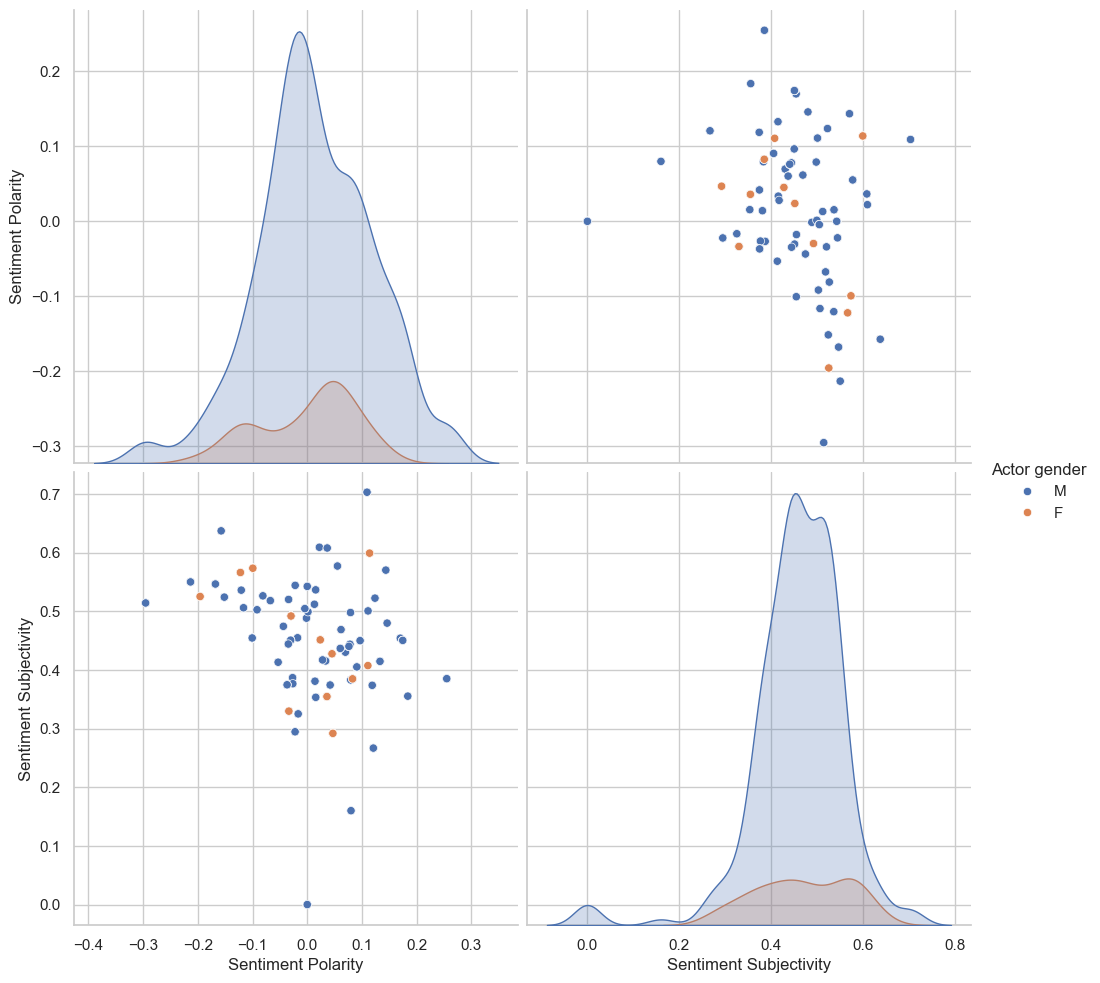

In [223]:
# Create a pair plot to visualize the relationship between sentiment polarity and subjectivity by gender
sns.set(style="whitegrid")
sns.pairplot(data=character_tvtropes_combined, hue='Actor gender', x_vars=['Sentiment Polarity', 'Sentiment Subjectivity'], y_vars=['Sentiment Polarity', 'Sentiment Subjectivity'], height=5)
plt.show()

In [225]:
import pandas as pd
from textblob import TextBlob

# Assuming you have a DataFrame named character_tvtropes_combined

# Define a function to analyze sentiment for a group
def analyze_sentiment(group):
    polarities = [TextBlob(character).sentiment.polarity for character in group['Character Type']]
    subjectivities = [TextBlob(character).sentiment.subjectivity for character in group['Character Type']]
    return pd.Series({
        'Average Polarity': sum(polarities) / len(polarities),
        'Average Subjectivity': sum(subjectivities) / len(subjectivities)
    })

# Group the data by character types and actor gender
grouped_data = character_tvtropes_combined.groupby(['Character Type', 'Actor gender'])

# Apply sentiment analysis to each group
sentiment_analysis = grouped_data.apply(analyze_sentiment).reset_index()


In [226]:
sentiment_analysis

,Character Type,Actor gender,Average Polarity,Average Subjectivity
0,,M,0.000000,0.000000
1,A Sadist Teacher in charge of an entire educat...,M,0.057278,0.495753
2,A badass falls head over heels in love and has...,F,-0.002941,0.494118
3,A badass falls head over heels in love and has...,M,-0.002941,0.494118
4,A character who is characterized by their inte...,M,0.043602,0.492651
...,...,...,...,...
81,"WHOA ! This guy is , like , Totally Radical ! ...",M,0.374351,0.628571
82,"Walking , talking , purring class . She does n...",F,0.172282,0.540714
83,"When it comes to committing crime , ( un ) for...",M,-0.037051,0.561901
84,Why they 're in front of bars and not behind t...,M,-0.201316,0.632526


<Figure size 1000x600 with 0 Axes>

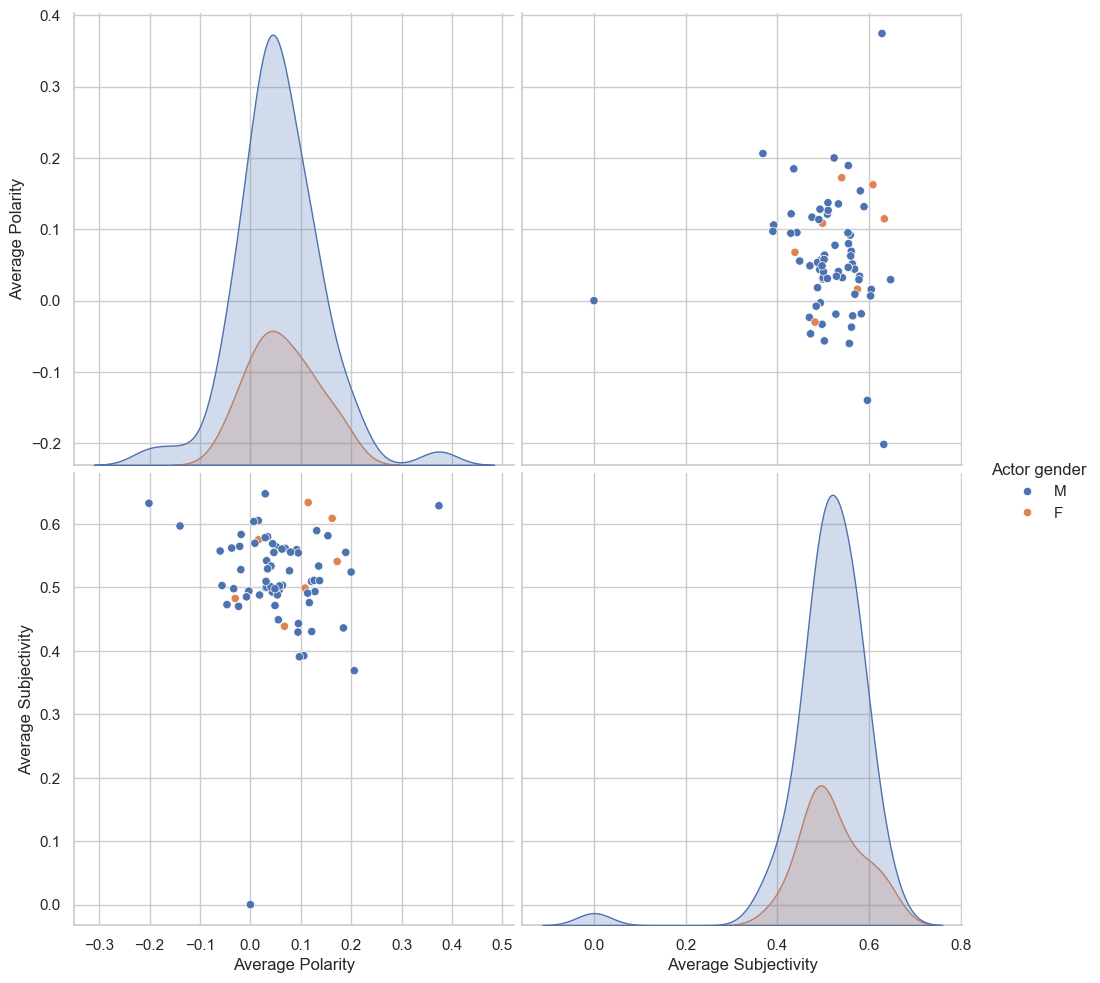

In [227]:
# Set the style
sns.set(style="whitegrid")

# Create a scatter plot with hue
plt.figure(figsize=(10, 6))
sns.pairplot(data=sentiment_analysis, hue='Actor gender', x_vars=['Average Polarity', 'Average Subjectivity'], y_vars=['Average Polarity', 'Average Subjectivity'], height=5)
plt.show()
# Show the plot
plt.show()


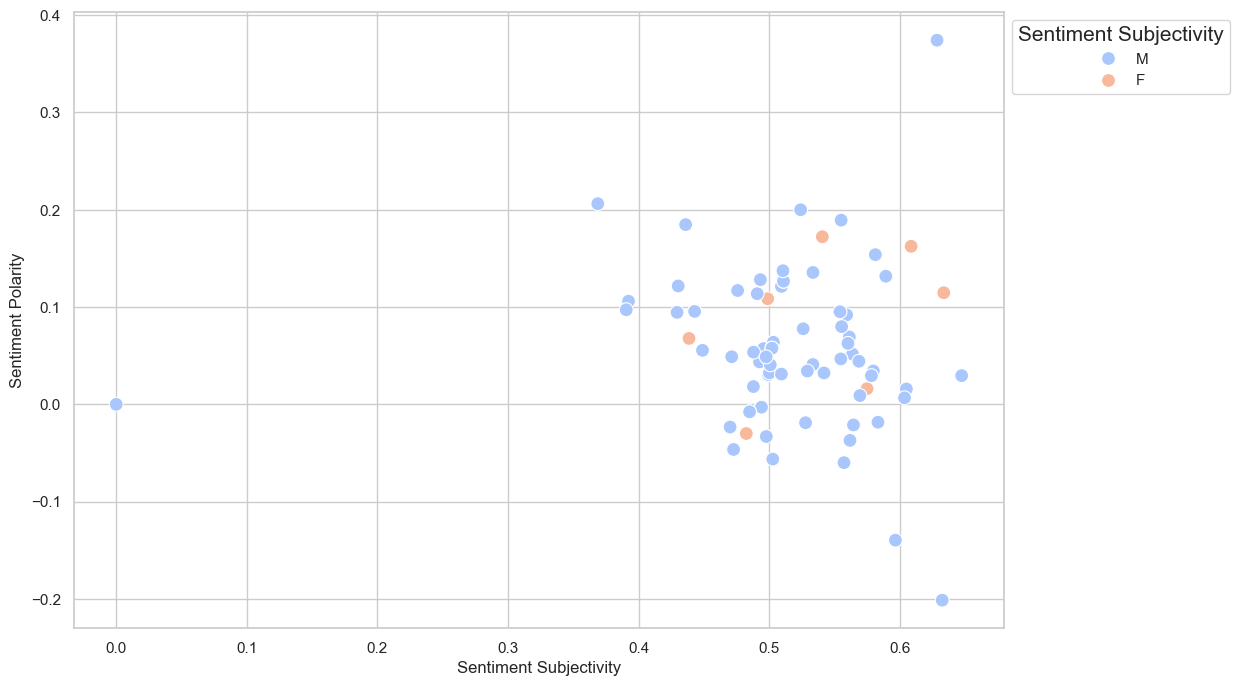

In [229]:
# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sentiment_analysis, x='Average Subjectivity', y='Average Polarity', hue='Actor gender', palette='coolwarm', s=100)

# Set plot labels and legend
plt.xlabel('Sentiment Subjectivity')
plt.ylabel('Sentiment Polarity')
plt.legend(title='Sentiment Subjectivity', title_fontsize='15', loc='best', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()